# **1)Modelaciòn: Clasificaciòn**

# **Modelación**

Los términos inferencia y predicción describen tareas en las que aprendemos de los datos de manera supervisada para encontrar un modelo que describa la relación entre las variables independientes y el resultado. Sin embargo, la inferencia y la predicción divergen cuando se trata del uso del modelo resultante:

*  Inferencia: use el modelo para aprender sobre el proceso de generación de datos.
* Predicción: utilice el modelo para predecir los resultados de nuevos puntos de datos

<img src="https://d33wubrfki0l68.cloudfront.net/478f2689f1b9903ce2feed61a1f5e9c9deb2bcc9/55b03/post/commentary/inference-vs-prediction_files/figure-html/unnamed-chunk-1-1.png" width=500>

**Flujos de trabajo para inferencia y predicción**

Los flujos de trabajo básicos para la inferencia y la predicción se describen en las siguientes secciones.

**Inferencia**
* Modelado: Razonar sobre el proceso de generación de datos y elegir el modelo estocástico que mejor se aproxime al proceso de generación de datos.
* Validación del modelo: evalúe la validez del modelo estocástico mediante análisis de residuos o pruebas de bondad de ajuste.
* Inferencia: utilice el modelo estocástico para comprender el proceso de generación de datos.

**Predicción**

* Modelado: considere varios modelos diferentes y diferentes configuraciones de parámetros.
* Selección de modelo: identifique el modelo con el mayor rendimiento predictivo utilizando conjuntos de validación / prueba; seleccione el modelo con el rendimiento más alto en el equipo de prueba.
* Predicción: aplique el modelo seleccionado en datos nuevos con la expectativa de que el modelo seleccionado también se generalice a los datos no vistos.

## **Librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sms
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
from sklearn import metrics

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import statsmodels.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SequentialFeatureSelector

import xgboost as xgb

import warnings

warnings.filterwarnings("ignore")

def MetricasMatrixConfusion(y,modelo,X,tipo="ml"):
    
    if (tipo=="ml"):
        Predicciones=modelo.predict(X)
    else:
        Probabilidad=modelo.predict(exog=X)
        Predicciones=np.where(Probabilidad <0.5,0,1)
    
    Accuracy_RF_test=metrics.accuracy_score(y,Predicciones)
    print(f'Accuracy: {Accuracy_RF_test}')
    Reporte_RF_test=metrics.classification_report(y,Predicciones)
    print(Reporte_RF_test)

    td1=pd.DataFrame(Predicciones,columns=["Predicciones"])
    td2=pd.concat([y.reset_index(drop=True),td1],axis=1)
    td2.columns=["Realidad","Predicion"]
    Matrix=pd.crosstab(td2["Realidad"],td2["Predicion"],margins=True)
    Matrix_Normalizada=pd.crosstab(td2["Realidad"],td2["Predicion"],normalize=0)
    
    sns.heatmap(Matrix_Normalizada, annot=True,linewidths = 0.01, cmap = "Blues")
    
    plt.show()
    print(Matrix)
    
def curva_roc(y,modelo,X,tipo="ml"):
    if (tipo=="ml"):
        y_pprob = modelo.predict_proba(X)[::,1] ## Sklearn
        Probabilidad=modelo.predict_proba(X=X)[:,1]
    else:
        y_pprob=modelo.predict(exog=X)
        Probabilidad=modelo.predict(exog=X)
    
    false_positive, true_positive, _ = roc_curve(y,  y_pprob)
    print('Modelo AUC:',roc_auc_score(y,  y_pprob))
    
    fpr, tpr, thresholds = roc_curve(y, Probabilidad )
    AUC_AD=round(roc_auc_score(y, Probabilidad),4)
   
    random_probs = [0 for i in range(len(y))]
    p_fpr, p_tpr, _ = roc_curve(y, random_probs, pos_label=1)
    plt.plot(fpr,tpr,linestyle="--",color="green",label="Decision Tree, AUC="+str(AUC_AD))
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    plt.title("CURVA ROC")
    plt.xlabel("Tasa Falsos Positivos")
    plt.ylabel("Tasa Verdaderos Positivos")
    plt.legend()
    plt.show()


## **Importar Datos**

In [2]:
df=pd.read_csv("BaseModelos.csv",index_col=False)
df.rename(columns={"CompraSeguro":"target"},inplace=True)

In [3]:
df.head()

,Gasto_Vida,Gasto_Vehiculos,Gasto_Otros,Tipo_Familia,Tipo_Pareja,Tipo_Soltero,Educacion_Superior,Educacion_Media,Educacion_Baja,Poblacion_Empresario,...,Mes Alta_Octubre,Mes Alta_Septiembre,Dia Semana_Jueves,Dia Semana_Lunes,Dia Semana_Martes,Dia Semana_Miércoles,Dia Semana_Sábado,Dia Semana_Viernes,target,Tipo Archivo
0,0.00,617.55,0.00,75.10,18.27,6.63,2.75,39.20,58.05,23.70,...,0,0,0,1,0,0,0,0,0.0,Entrenamiento
1,973.61,0.00,386.87,62.29,32.55,5.17,40.84,41.12,18.04,37.53,...,0,0,0,0,0,0,1,0,0.0,Entrenamiento
2,0.00,3572.01,273.15,46.41,30.94,22.65,7.63,28.36,64.01,5.50,...,0,0,0,0,0,1,0,0,0.0,Entrenamiento
3,87.91,4558.71,521.66,87.86,12.14,0.00,21.17,56.95,21.87,19.05,...,0,0,0,0,0,0,0,1,0.0,Entrenamiento
4,0.00,4289.61,0.00,37.63,29.59,32.77,26.98,52.61,20.40,32.17,...,0,0,0,0,0,0,0,0,0.0,Entrenamiento


In [4]:
df.shape

(3892, 64)

**Importamos Variables**

In [5]:
Cat_chi2=pd.read_csv("CategoricasChi2.csv")
Cat_chi2.shape

Cat_Mutual=pd.read_csv("CategoricasMutualInfo.csv")
Cat_Mutual.shape

Num_corr=pd.read_csv("Num_Sig_Correlacion_Parametrica.csv")
Num_corr.shape

Num_Mutual=pd.read_csv("Num_MutualInfo.csv")
Num_Mutual.shape

(17, 1)

(10, 2)

## **Escenario con Mutual**

In [7]:
df["Tipo Archivo"].value_counts()

Entrenamiento    2999
Prueba            893
Name: Tipo Archivo, dtype: int64

In [8]:
Historia=df[df["Tipo Archivo"]=="Entrenamiento"].reset_index(drop=True)

In [9]:
Historia.shape

(2999, 64)

In [10]:
Variables=Cat_Mutual.Variables.tolist()+Num_Mutual.Variables.tolist()

In [11]:
X= Historia[Variables]
y=Historia[["target"]].astype(int).astype("category")

In [12]:
X

,Productos_Vehiculos_4,Productos_Otros_2,Mes Alta_Mayo,Productos_Vida_3,Mes Alta_Febrero,Mes Alta_Agosto,Productos_Otros_3,Mes Alta_Julio,Productos_Otros_5,Mes Alta_Septiembre,...,Gasto_Vehiculos,Vivienda_Propiedad,Gasto_Otros,Educacion_Media,Poblacion_Trabajador_Cualificado,Medico_Seguro_Privado,Educacion_Superior,Tipo_Soltero,Poblacion_Empresario,Ingresos_De_20000_Hasta_40000
0,0,0,0,0,0,0,0,0,0,0,...,617.55,71.34,0.00,39.20,21.01,32.77,2.75,6.63,23.70,1.47
1,0,0,0,0,0,0,0,0,0,0,...,0.00,92.04,386.87,41.12,11.54,43.84,40.84,5.17,37.53,3.38
2,0,1,0,0,0,0,0,0,0,0,...,3572.01,56.37,273.15,28.36,34.78,17.48,7.63,22.65,5.50,1.72
3,0,1,0,0,0,0,0,1,0,0,...,4558.71,93.38,521.66,56.95,22.28,44.57,21.17,0.00,19.05,6.39
4,0,0,0,0,1,0,0,0,0,0,...,4289.61,12.63,0.00,52.61,1.92,45.32,26.98,32.77,32.17,27.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,0,1,0,0,0,1,0,0,0,0,...,6712.11,100.00,82.93,29.06,0.00,82.97,50.95,0.00,46.69,41.62
2995,0,0,0,0,0,0,0,0,0,0,...,1653.89,17.29,36.73,46.03,19.46,17.86,3.21,63.35,17.76,8.90
2996,0,0,0,0,0,0,0,0,0,0,...,3704.71,15.04,89.90,48.54,79.77,19.68,0.00,0.00,20.23,15.09
2997,0,1,0,0,0,0,0,0,0,0,...,0.00,0.00,242.76,0.00,0.00,45.57,0.00,100.00,0.00,0.00


In [14]:
y.value_counts()

target
0         2830
1          169
dtype: int64

In [15]:
y.value_counts(normalize=True)

target
0         0.943648
1         0.056352
dtype: float64

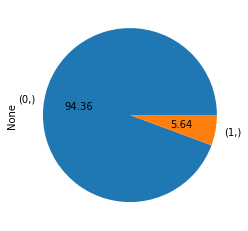

In [16]:
y.value_counts().plot(kind="pie", autopct="%.2f");

## **Divisiòn Train y Test**
Evaluar la capacidad predictiva de un modelo consiste en comprobar aproxima sus predicciones a los verdaderos valores de la variable respuesta. Para poder cuantificarlo de forma correcta, se necesita disponer de un conjunto de observaciones, de las que se conozca la variable respuesta, pero que el modelo no haya "visto", es decir, que no hayan participado en su ajuste. Con esta finalidad, se dividen los datos disponibles en un conjunto de entrenamiento y un conjunto de test.

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123,stratify=y)

In [18]:
y_train.value_counts(normalize=True)

target
0         0.943783
1         0.056217
dtype: float64

In [19]:
y_test.value_counts(normalize=True)

target
0         0.943333
1         0.056667
dtype: float64

# **Modelo1: regresión logística**

La regresión logística es un método estadístico que trata de modelar la probabilidad de una variable cualitativa binaria (dos posibles valores) en función de una o más variables independientes. La principal aplicación de la regresión logística es la creación de modelos de clasificación binaria.

Se llama regresión logística simple cuando solo hay una variable independiente y regresión logística múltiple cuando hay más de una. Dependiendo del contexto, a la variable modelada se le conoce como variable dependiente o variable respuesta, y a las variables independientes como regresores, predictores o features.

**Enfoque Machine Learning**

In [20]:
# Crear una instancia del modelo de regresión logística
RegresionLogit_sklearn= LogisticRegression()
# Entrenar el modelo utilizando los datos de entrenamiento
RegresionLogit_sklearn.fit(x_train, y_train) # Entrando

LogisticRegression()

In [21]:
RegresionLogit_sklearn.intercept_

array([-0.01430382])

In [22]:
RegresionLogit_sklearn.coef_

array([[-5.86165002e-04, -1.08488041e-03, -3.10616628e-04,
        -1.74981661e-05, -1.19760909e-03, -1.38063893e-03,
        -9.35923947e-04, -2.38432389e-03, -9.75501199e-06,
        -1.68071890e-03, -2.63904985e-05,  3.99812798e-04,
        -4.00456661e-06,  0.00000000e+00, -1.57076372e-03,
        -3.08405953e-03, -3.16736386e-03,  5.91510270e-04,
        -1.26940553e-02, -4.37299877e-04, -3.29846881e-02,
        -5.86754781e-02, -3.68635459e-03,  1.32492509e-02,
        -4.67293888e-02, -1.99442984e-02, -2.12551701e-02]])

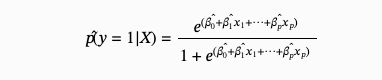

## **Error de Train**

In [23]:
y_train.value_counts()

target
0         1981
1          118
dtype: int64

In [24]:
# Predicciones del Modelo en la base de Train
Prediccion_Train=RegresionLogit_sklearn.predict(x_train)

In [25]:
Prediccion_Train

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
y_train.value_counts()

target
0         1981
1          118
dtype: int64

Accuracy: 0.9361600762267747
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1981
           1       0.38      0.20      0.26       118

    accuracy                           0.94      2099
   macro avg       0.66      0.59      0.62      2099
weighted avg       0.92      0.94      0.93      2099



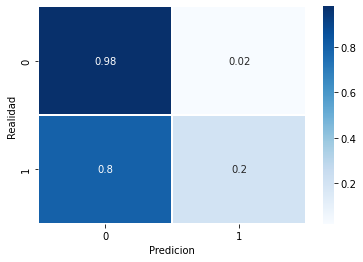

Predicion     0   1   All
Realidad                 
0          1941  40  1981
1            94  24   118
All        2035  64  2099


In [27]:
MetricasMatrixConfusion(y_train,RegresionLogit_sklearn,x_train)

* 1941 dejar de gestionar, costo
* Ganancia por Vender: 94 cleintes, No vendistes
* 64 Gestionar, 24 Getsionaste compraron, 40 Gestionastes y no compraron

## **Metricas de Error Train**

La precisión (accuracy en inglés) es una métrica comúnmente utilizada para evaluar la calidad de un modelo de aprendizaje automático o clasificación. En términos simples, el accuracy mide la proporción de predicciones correctas que realiza un modelo en relación con el total de predicciones realizadas.

El accuracy se calcula dividiendo el número de predicciones correctas por el número total de predicciones. Matemáticamente, se puede expresar de la siguiente manera:

Accuracy = (Número de predicciones correctas) / (Número total de predicciones)

In [28]:
Accuracy= (1941+24)/2099

In [29]:
Accuracy

0.9361600762267747

In [30]:
Accuracy_Train_RL=metrics.accuracy_score(y_train,Prediccion_Train)

In [31]:
Accuracy_Train_RL

0.9361600762267747

**Nota**

Esta métrica es especialmente útil cuando las clases están balanceadas, es decir, cuando el número de muestras en cada clase es similar. Sin embargo, puede ser engañosa en casos de desequilibrio de clases, donde una clase tiene muchas más muestras que otra. En estos casos, un modelo que simplemente prediga siempre la clase mayoritaria puede obtener un alto accuracy, pero puede ser ineficaz en la detección de la clase minoritaria.


In [32]:
fscore_0_train_lg1= f1_score(y_train,Prediccion_Train,pos_label=0)
fscore_1_train_lg1=f1_score(y_train,Prediccion_Train,pos_label=1)

Precision (Precisión): La precisión se refiere a la proporción de predicciones positivas correctas sobre el total de predicciones positivas realizadas por el modelo. Es una medida de cuán precisas son las predicciones positivas. Se calcula de la siguiente manera:

* Precision = Verdaderos positivos / (Verdaderos positivos + Falsos positivos)

Recall (Recuperación o Sensibilidad): El recall se refiere a la proporción de instancias positivas que el modelo predijo correctamente sobre el total de instancias positivas en los datos reales. Es una medida de la capacidad del modelo para identificar correctamente las instancias positivas. Se calcula de la siguiente manera:

Recall = Verdaderos positivos / (Verdaderos positivos + Falsos negativos)

**Alta precisión y alto recall**

Imaginemos que estás desarrollando un modelo de detección de spam para un cliente que administra un servicio de correo electrónico. La clase positiva representa los correos electrónicos legítimos (no spam). En este caso, un modelo con alta precisión y alto recall significa que el modelo es capaz de identificar correctamente la mayoría de los correos electrónicos legítimos y minimiza los falsos positivos, lo que garantiza que los correos electrónicos clasificados como legítimos sean altamente confiables y minimiza la posibilidad de que se clasifiquen como spam.

**Alta precisión y bajo recall**

Supongamos que estás construyendo un modelo de diagnóstico médico para detectar una enfermedad rara. La clase positiva representa los casos reales de la enfermedad. En este caso, un modelo con alta precisión y bajo recall implica que el modelo  logra detectar casi todos los casos positivos de la enfermedad, pero cuando hace una predicción positiva, No es confiable.

**Baja precisión y bajo recall**

Supongamos que estás desarrollando un modelo para identificar perros en imágenes. La clase positiva representa las imágenes de perros. En este caso, un modelo con baja precisión y bajo recall indica que el modelo no logra clasificar correctamente la mayoría de las imágenes de perros. Es posible que el modelo no esté capturando los patrones relevantes para distinguir los perros de otras clases y, por lo tanto, su rendimiento general es deficiente, con una alta tasa de falsos negativos (imágenes de perros clasificadas incorrectamente como no perros) y falsos positivos (imágenes no perro clasificadas incorrectamente como perros).

**Baja Precisión y Alto Recall**
Supongamos que estás construyendo un modelo de diagnóstico médico para detectar una enfermedad rara. La clase positiva representa los casos reales de la enfermedad. En este caso, un modelo con alta precisión y bajo recall implica que el modelo no logra detectar todos los casos positivos de la enfermedad, pero cuando hace una predicción positiva, es altamente confiable. Por lo tanto, aunque el modelo pueda perder algunos casos positivos, las predicciones positivas que realiza se pueden considerar bastante precisas y dignas de confianza.

 **CURVA ROC**

AUC (Área bajo la curva) es una métrica comúnmente utilizada para evaluar el rendimiento de un modelo de clasificación binaria en problemas de aprendizaje automático. AUC representa el área bajo la curva ROC (Receiver Operating Characteristic) y se utiliza para medir la capacidad de discriminación del modelo, es decir, cuán bien es capaz de distinguir entre las clases positiva y negativa.

La curva ROC es una representación gráfica que muestra la relación entre la tasa de verdaderos positivos (Sensibilidad) y la tasa de falsos positivos (1 - Especificidad) para diferentes umbrales de clasificación. Cada punto en la curva ROC representa un umbral de clasificación diferente, y el AUC se calcula como el área bajo esta curva.

El valor de AUC oscila entre 0 y 1, donde un valor de 1 indica un modelo perfecto que es capaz de clasificar perfectamente todas las muestras positivas y negativas. Un valor de 0.5 indica un rendimiento aleatorio, mientras que un valor inferior a 0.5 indica que el modelo tiene un rendimiento peor que el azar.

**AUC Train**

Modelo AUC: 0.8351414710940375


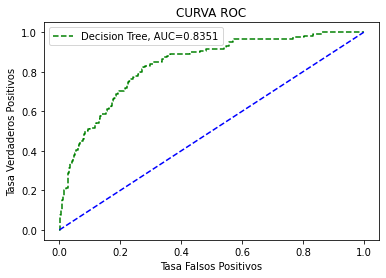

In [33]:
curva_roc(y_train,RegresionLogit_sklearn,x_train)

In [34]:
Probalidad_Train_RL_Sklean=RegresionLogit_sklearn.predict_proba(x_train)
Probalidad_Train_RL_Sklean

array([[9.87428763e-01, 1.25712372e-02],
       [9.31130095e-01, 6.88699055e-02],
       [9.82734984e-01, 1.72650163e-02],
       ...,
       [9.58769152e-01, 4.12308476e-02],
       [9.79999870e-01, 2.00001297e-02],
       [9.99877691e-01, 1.22309177e-04]])

In [35]:
AUC_Train_RL_Sklearn=round(roc_auc_score(y_train, Probalidad_Train_RL_Sklean[:,1]),4)
AUC_Train_RL_Sklearn

0.8351

## **Metricas de Test**

In [36]:
Prediccion_Test=RegresionLogit_sklearn.predict(x_test)

In [37]:
y_test.shape

(900, 1)

Accuracy: 0.9366666666666666
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       849
           1       0.39      0.22      0.28        51

    accuracy                           0.94       900
   macro avg       0.67      0.60      0.62       900
weighted avg       0.92      0.94      0.93       900



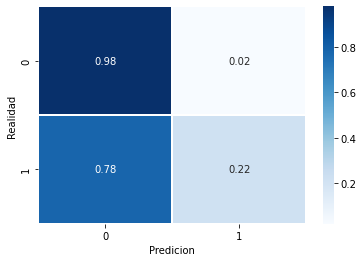

Predicion    0   1  All
Realidad               
0          832  17  849
1           40  11   51
All        872  28  900


In [38]:
MetricasMatrixConfusion(y_test,RegresionLogit_sklearn,x_test)

In [39]:
Accuracy_TestRL=metrics.accuracy_score(y_test,Prediccion_Test)
fscore_0_test_lg1= f1_score(y_test,Prediccion_Test,pos_label=0)
fscore_1_test_lg1=f1_score(y_test,Prediccion_Test,pos_label=1)

Modelo AUC: 0.8003187140580614


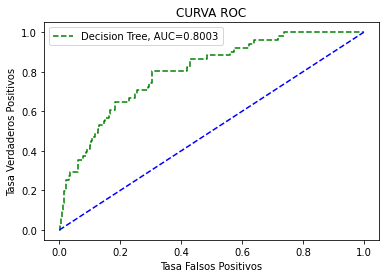

In [40]:
curva_roc(y_test,RegresionLogit_sklearn,x_test)

In [41]:
Probalidad_Test_RL_Sklean=RegresionLogit_sklearn.predict_proba(x_test)
AUC_Test_RL_Sklearn=round(roc_auc_score(y_test, Probalidad_Test_RL_Sklean[:,1]),4)
AUC_Test_RL_Sklearn

0.8003

## **Enfoque Inferencial**

In [42]:
variables_eliminar=["Productos_Vida_8"]

In [43]:
x_train_1=sms.add_constant(x_train.drop(columns=variables_eliminar),prepend=True)
x_test_1=sms.add_constant(x_test.drop(columns=variables_eliminar),prepend=True)

In [44]:
Modelo_Logit=sms.Logit(endog=y_train,exog=x_train_1).fit(method="bfgs")

         Current function value: 0.130099
         Iterations: 35
         Function evaluations: 48
         Gradient evaluations: 40


In [45]:
Modelo_Logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                  Results: Logit
==================================================================================
Model:                     Logit                 Pseudo R-squared:      0.399     
Dependent Variable:        target                AIC:                   600.1556  
Date:                      2023-07-19 18:25      BIC:                   752.6844  
No. Observations:          2099                  Log-Likelihood:        -273.08   
Df Model:                  26                    LL-Null:               -454.29   
Df Residuals:              2072                  LLR p-value:           5.6191e-61
Converged:                 0.0000                Scale:                 1.0000    
----------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z     P>|z|   [0.025   0.975]
----------------------------------------------------------------------------------
const                            -5.9226   0.5719 -10.3564 0.0000  -7.0435 -4.8018
Productos_Vehiculos_4            -0.4683   1.0721  -0.4368 0.6622  -2.5696  1.6329
Productos_Otros_2                 0.4754   0.2574   1.8468 0.0648  -0.0291  0.9799
Mes Alta_Mayo                     0.1268   0.4788   0.2649 0.7911  -0.8116  1.0653
Productos_Vida_3                 -0.0127   3.7386  -0.0034 0.9973  -7.3403  7.3149
Mes Alta_Febrero                 -0.4113   0.4797  -0.8575 0.3912  -1.3516  0.5289
Mes Alta_Agosto                  -0.2551   0.3504  -0.7282 0.4665  -0.9418  0.4316
Productos_Otros_3                -0.7477   0.6127  -1.2202 0.2224  -1.9486  0.4533
Mes Alta_Julio                   -0.9260   0.6055  -1.5293 0.1262  -2.1127  0.2607
Productos_Otros_5                -0.0078   6.9603  -0.0011 0.9991 -13.6498 13.6342
Mes Alta_Septiembre              -0.6576   0.5542  -1.1866 0.2354  -1.7437  0.4286
Productos_Vehiculos_6            -0.0216   4.5550  -0.0048 0.9962  -8.9494  8.9061
Mes Alta_Octubre                  0.3983   0.3845   1.0359 0.3003  -0.3553  1.1518
Productos_Otros_6                -0.0030  18.9054  -0.0002 0.9999 -37.0569 37.0508
Productos_Vehiculos_3            -0.9555   0.7163  -1.3340 0.1822  -2.3593  0.4484
Dia Semana_Martes                -0.7671   0.4072  -1.8836 0.0596  -1.5653  0.0311
Dia Semana_Jueves                -1.1191   0.4458  -2.5104 0.0121  -1.9929 -0.2454
Gasto_Vehiculos                   0.0008   0.0001  13.2541 0.0000   0.0007  0.0010
Vivienda_Propiedad                0.0018   0.0038   0.4655 0.6416  -0.0057  0.0093
Gasto_Otros                      -0.0003   0.0003  -0.9896 0.3224  -0.0008  0.0002
Educacion_Media                   0.0051   0.0060   0.8402 0.4008  -0.0068  0.0169
Poblacion_Trabajador_Cualificado  0.0035   0.0073   0.4887 0.6251  -0.0107  0.0178
Medico_Seguro_Privado             0.0084   0.0068   1.2372 0.2160  -0.0049  0.0217
Educacion_Superior                0.0330   0.0078   4.2379 0.0000   0.0178  0.0483
Tipo_Soltero                     -0.0049   0.0071  -0.6937 0.4879  -0.0189  0.0090
Poblacion_Empresario             -0.0155   0.0073  -2.1214 0.0339  -0.0298 -0.0012
Ingresos_De_20000_Hasta_40000    -0.0102   0.0109  -0.9412 0.3466  -0.0315  0.0111
==================================================================================

"""

In [46]:
p_values=Modelo_Logit.pvalues
var_significativa=p_values[p_values<0.05].index
len(var_significativa)

5

In [47]:
var_no_significativa=p_values[p_values>0.05].index
len(var_no_significativa)

22

* Modelo no converge

### Identifcar multicolinealidad

**El VIF**
es una medida utilizada para detectar multicolinealidad en un modelo de regresión. Indica la inflación de la varianza de los coeficientes debido a la multicolinealidad. Un VIF alto para una variable predictor indica una alta correlación con otras variables predictoras en el modelo

In [48]:
x=x_train_1.drop(["const"],axis=1)
tabla_vif=pd.DataFrame()
tabla_vif["variables"]=x.columns
tabla_vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

In [49]:
tabla_vif.sort_values("VIF")

,variables,VIF
3,Productos_Vida_3,1.010740
10,Productos_Vehiculos_6,1.020503
0,Productos_Vehiculos_4,1.028523
12,Productos_Otros_6,1.036331
8,Productos_Otros_5,1.047990
13,Productos_Vehiculos_3,1.124385
2,Mes Alta_Mayo,1.132095
4,Mes Alta_Febrero,1.138472
7,Mes Alta_Julio,1.159837
9,Mes Alta_Septiembre,1.160084


**Eliminación Variables**

La función SelectFromModel de sklearn.feature_selection es una herramienta de selección de características que se puede utilizar para eliminar automáticamente variables en un modelo de regresión logística basado en la importancia de las características.

In [50]:
logit=LogisticRegression()
Selector=SequentialFeatureSelector(logit,direction="forward")
Selector.fit(x_train_1,y_train)

SequentialFeatureSelector(estimator=LogisticRegression())

In [51]:
seleccion_variables=x_train.columns[Selector.get_support()]

In [52]:
seleccion_variables

Index(['Productos_Vehiculos_4', 'Productos_Otros_2', 'Mes Alta_Mayo',
       'Productos_Vida_3', 'Mes Alta_Febrero', 'Mes Alta_Agosto',
       'Productos_Otros_5', 'Mes Alta_Octubre', 'Gasto_Vehiculos',
       'Gasto_Otros', 'Educacion_Superior', 'Poblacion_Empresario',
       'Ingresos_De_20000_Hasta_40000'],
      dtype='object')

In [53]:
x_train_2=x_train[seleccion_variables]
Modelo_Logit_Final=sms.Logit(endog=y_train,exog=x_train_2).fit(method="bfgs")

         Current function value: 0.350748
         Iterations: 35
         Function evaluations: 47
         Gradient evaluations: 39


In [54]:
Modelo_Logit_Final.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                Results: Logit
==============================================================================
Model:                    Logit                Pseudo R-squared:     -0.621   
Dependent Variable:       target               AIC:                  1498.4415
Date:                     2023-07-19 18:26     BIC:                  1571.8814
No. Observations:         2099                 Log-Likelihood:       -736.22  
Df Model:                 12                   LL-Null:              -454.29  
Df Residuals:             2086                 LLR p-value:          1.0000   
Converged:                0.0000               Scale:                1.0000   
------------------------------------------------------------------------------
                               Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
------------------------------------------------------------------------------
Productos_Vehiculos_4         -0.1969   1.2641 -0.1558 0.8762  -2.6745  2.2806
Productos_Otros_2             -1.1828   0.1720 -6.8787 0.0000  -1.5198 -0.8458
Mes Alta_Mayo                 -1.6967   0.3617 -4.6910 0.0000  -2.4056 -0.9878
Productos_Vida_3              -0.0011  12.8834 -0.0001 0.9999 -25.2521 25.2500
Mes Alta_Febrero              -1.7768   0.3764 -4.7204 0.0000  -2.5145 -1.0390
Mes Alta_Agosto               -1.6492   0.2532 -6.5138 0.0000  -2.1455 -1.1530
Productos_Otros_5             -0.0162   3.4676 -0.0047 0.9963  -6.8127  6.7802
Mes Alta_Octubre              -1.5974   0.3116 -5.1263 0.0000  -2.2082 -0.9867
Gasto_Vehiculos                0.0001   0.0000  4.3410 0.0000   0.0001  0.0002
Gasto_Otros                   -0.0010   0.0003 -3.2572 0.0011  -0.0016 -0.0004
Educacion_Superior             0.0038   0.0053  0.7188 0.4723  -0.0066  0.0143
Poblacion_Empresario          -0.0510   0.0053 -9.6687 0.0000  -0.0613 -0.0407
Ingresos_De_20000_Hasta_40000 -0.0415   0.0091 -4.5451 0.0000  -0.0594 -0.0236
==============================================================================

"""

Variable Independiente Continua:

Para una variable independiente continua, el coeficiente representa el cambio esperado en el logaritmo de la odds para un incremento unitario en la variable, manteniendo constantes todas las demás variables. Si el coeficiente es positivo, implica que un aumento en el valor de la variable independiente está asociado con un aumento en la probabilidad de que el evento ocurra. Si el coeficiente es negativo, implica que un aumento en el valor de la variable independiente está asociado con una disminución en la probabilidad del evento.

**Interpretación**

* Poblacion_Empresario: -0.0510; el p valor es 0.0000, menor a 0.05, por lo tanto la variable es significativa
* -0.05; el logaritmo (P comprar Seguro / P no compra del seguro) disminuye en 0.05 unidades cuando la poblacion de empresarios aumenta 1 porcentual 

In [55]:
from math import e

In [56]:
(1-e**(-1.6967))

0.8167126245110166

In [57]:
print(e**(-0.05))

0.951229424500714


In [58]:
e**(0.0038)

1.003807229154028

Es común utilizar la función exponencial (exp) del coeficiente para obtener la razón de probabilidades (odds ratio), que proporciona una interpretación más directa de la relación entre la variable independiente y el resultado. Un odds ratio mayor a 1 indica un aumento en la probabilidad del evento, mientras que un odds ratio menor a 1 indica una disminución en la probabilidad.

**Variable Independiente Categórica:**

Para una variable independiente categórica, el coeficiente representa el cambio en el logaritmo de la odds en comparación con la categoría de referencia (que generalmente se codifica como 0 o "No"). Si el coeficiente es positivo, implica que la categoría en comparación tiene una mayor probabilidad de que el evento ocurra en comparación con la categoría de referencia. Si el coeficiente es negativo, implica que la categoría en comparación tiene una menor probabilidad de que el evento ocurra en comparación con la categoría de referencia.

In [59]:
print(e**(-1.7768))

0.16917865368889545


In [60]:
print(e**(-1.6967))

0.1832873754889834


In [61]:
coefientes= Modelo_Logit_Final.params
coefientes_exp=np.exp(coefientes)

In [62]:
td_coeficiente=pd.DataFrame({"variable":coefientes_exp.index.tolist(),"coef":coefientes_exp.tolist()})
td_coeficiente.sort_values("coef",ascending=False)

,variable,coef
10,Educacion_Superior,1.003833
8,Gasto_Vehiculos,1.000135
9,Gasto_Otros,0.998994
3,Productos_Vida_3,0.998950
6,Productos_Otros_5,0.983912
12,Ingresos_De_20000_Hasta_40000,0.959371
11,Poblacion_Empresario,0.950283
0,Productos_Vehiculos_4,0.821237
1,Productos_Otros_2,0.306420
7,Mes Alta_Octubre,0.202419


## **Train Error**

In [63]:
Probabilidad_Trian_RL_stastmodels=Modelo_Logit_Final.predict(exog=x_train_2)
Prediciones_Trian_RL_stastmodels=np.where(Probabilidad_Trian_RL_stastmodels <0.5,0,1)

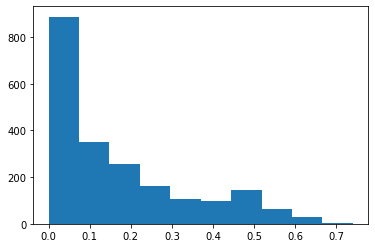

In [64]:
plt.hist(Probabilidad_Trian_RL_stastmodels);

Accuracy: 0.8832777513101477
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1981
           1       0.07      0.08      0.08       118

    accuracy                           0.88      2099
   macro avg       0.51      0.51      0.51      2099
weighted avg       0.90      0.88      0.89      2099



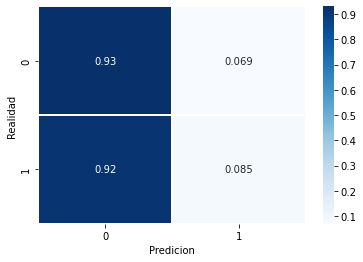

Predicion     0    1   All
Realidad                  
0          1844  137  1981
1           108   10   118
All        1952  147  2099


In [65]:
MetricasMatrixConfusion(y_train,Modelo_Logit_Final,x_train_2,tipo="estadistico")

Modelo AUC: 0.4801033547514952


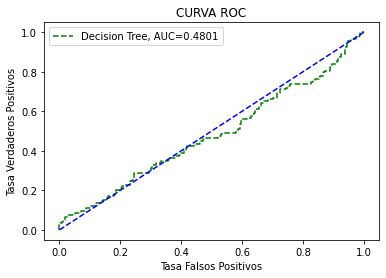

In [66]:
curva_roc(y_train,Modelo_Logit_Final,x_train_2,tipo="estadistico")

In [67]:
Accuracy_Train_lg2=metrics.accuracy_score(y_train,Prediciones_Trian_RL_stastmodels)
fscore_0_train_lg2= f1_score(y_train,Prediciones_Trian_RL_stastmodels,pos_label=0)
fscore_1_train_lg2=f1_score(y_train,Prediciones_Trian_RL_stastmodels,pos_label=1)

AUC_Train_RL2=round(roc_auc_score(y_train, Probabilidad_Trian_RL_stastmodels),4)
AUC_Train_RL2

0.4801

## **Test Error**

In [68]:
x_test_2=x_test[seleccion_variables]

In [69]:
Probabilidad_Test_RL_stastmodels=Modelo_Logit_Final.predict(exog=x_test_2)
Prediciones_Test_RL_stastmodels=np.where(Probabilidad_Test_RL_stastmodels <0.5,0,1)

Accuracy: 0.8755555555555555
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       849
           1       0.03      0.04      0.03        51

    accuracy                           0.88       900
   macro avg       0.49      0.48      0.48       900
weighted avg       0.89      0.88      0.88       900



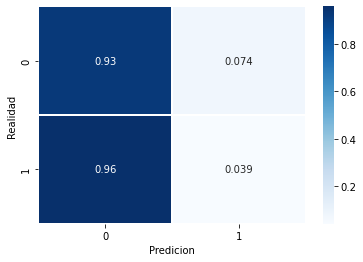

Predicion    0   1  All
Realidad               
0          786  63  849
1           49   2   51
All        835  65  900


In [70]:
MetricasMatrixConfusion(y_test,Modelo_Logit_Final,x_test_2,tipo="estadistico")

Modelo AUC: 0.39825400124714194


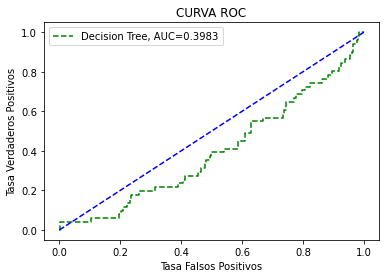

In [71]:
curva_roc(y_test,Modelo_Logit_Final,x_test_2,tipo="estadistico")

In [72]:
Accuracy_Test_lg2=metrics.accuracy_score(y_test,Prediciones_Test_RL_stastmodels)
fscore_0_Test_lg2= f1_score(y_test,Prediciones_Test_RL_stastmodels,pos_label=0)
fscore_1_Test_lg2=f1_score(y_test,Prediciones_Test_RL_stastmodels,pos_label=1)

In [73]:
AUC_Test_RL2=round(roc_auc_score(y_test, Probabilidad_Test_RL_stastmodels),4)
AUC_Test_RL2

0.3983

# **2) Arbol de Clasificación**
* El enfoque classification and regression tree (CART) fue desarrollado por Breiman et al. (1984).
* Son un tipo de algoritmos de aprendizaje supervisado (i.e., existe una variable objetivo predefinida).
* Principalmente usados en problemas de clasificación.
* Las variables de entrada y salida pueden ser categóricas o continuas.
* Divide el espacio de predictores (variables independientes) en regiones distintas y no sobrepuestas.


<img src="https://bookdown.org/content/2031/images/decision_tree_explanation.png" width=500>

Se divide la población o muestra en conjuntos homegéneos basados en la variable de entrada más significativa.
La construcción del árbol sigue un enfoque de división binaria recursiva (top-down greddy approach). Greedy -> analiza la mejor variable para ramificación sólo en el proceso de división actual

**Ventajas**

* Fácil de entender
* Util en exploración de datos:identificar importancia de variables a partir de cientos de variables.
* Menos limpieza de datos: outliers y valores faltantes no influencian el modelo (A un cierto grado)
* El tipo de datos no es una restricción
* Es un método no paramétrico (i.e., no hay suposición acerca del espacio de distribución y la estructura del clasificador)

**Desventajas**
* Sobreajuste
* Pérdida de información al categorizar variables continuas
* Precisión: métodos como SVM y clasificadores tipo ensamblador a menudo tienen tasas de error 30% más bajas que CART (Classification and Regression Trees)
* Inestabilidad: un pequeño cambio en los datos puede modificar ampliamente la estructura del árbol. Por lo tanto la interpretación no es tan directa como parece.

**¿Cómo decide un árbol donde ramificarse?**

* La decisión de hacer divisiones estratégicas afecta altamente la precisión del árbol.
* Los criterios de decisión son diferentes para árboles de clasificación y regresión.
* Existen varios algortmos para decidir la ramificación.
* La creación de subnodos incrementa la homogeneidad de los subnodos resultantes. Es decir, la pureza del nodo se incrementa respecto a la variable objetivo.
* Se prueba la división con todas las variables y se escoge la que produce subnodos más homogéneos.
* Algunos algoritmos más comunes para la selección: Indice Gini, Chi Cuadrado, Ganancia de la información y Reducción en la varianza

**Indice Gini**

“Si seleccionamos aletoriamente dos items de una población, entonces estos deben ser de la misma clase y la probabilidad de esto es 1 si la población es pura”.

Variable objetivo categórica: “Success” o “Failure”
Solo divisiones binarias
A mayor valor de índice Gini, mayor la homogeneidad
CART (Classification and Regression Tree) usa el método de Gini para la división binaria

**Cálculo de índice Gini**

* Calcular Gini para los subnodos usando la fórmula de la suma de los cuadrados de probabilidad para success y failure (p^2 + q^2).
* Calcular Gini para la división usando score Gini ponderado para cada nodo de la división

<img src="https://bookdown.org/content/2031/images/example_tree.png" width=500>


* Mujer	(0.2)^2 + (0.8)^2 = 0.68  , IX	(0.43)^2 +(0.57)^2 = 0.51
* Hombre	(0.65)^2 + (0.35)^2 = 0.55, 	X	(0.56)^2 +(0.44)^2 = 0.51
* Pond.	(10/30)0.68 + (20/30)0.55 = 0.59, 	Pond.	(14/30)0.51 + (16/30)0.51 = 0.51

### **Entrenar un Arbol**

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn import tree

In [75]:
x_train.shape

(2099, 27)

In [76]:
Arbol_Simple= DecisionTreeClassifier(random_state=1)
Arbol_Simple.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

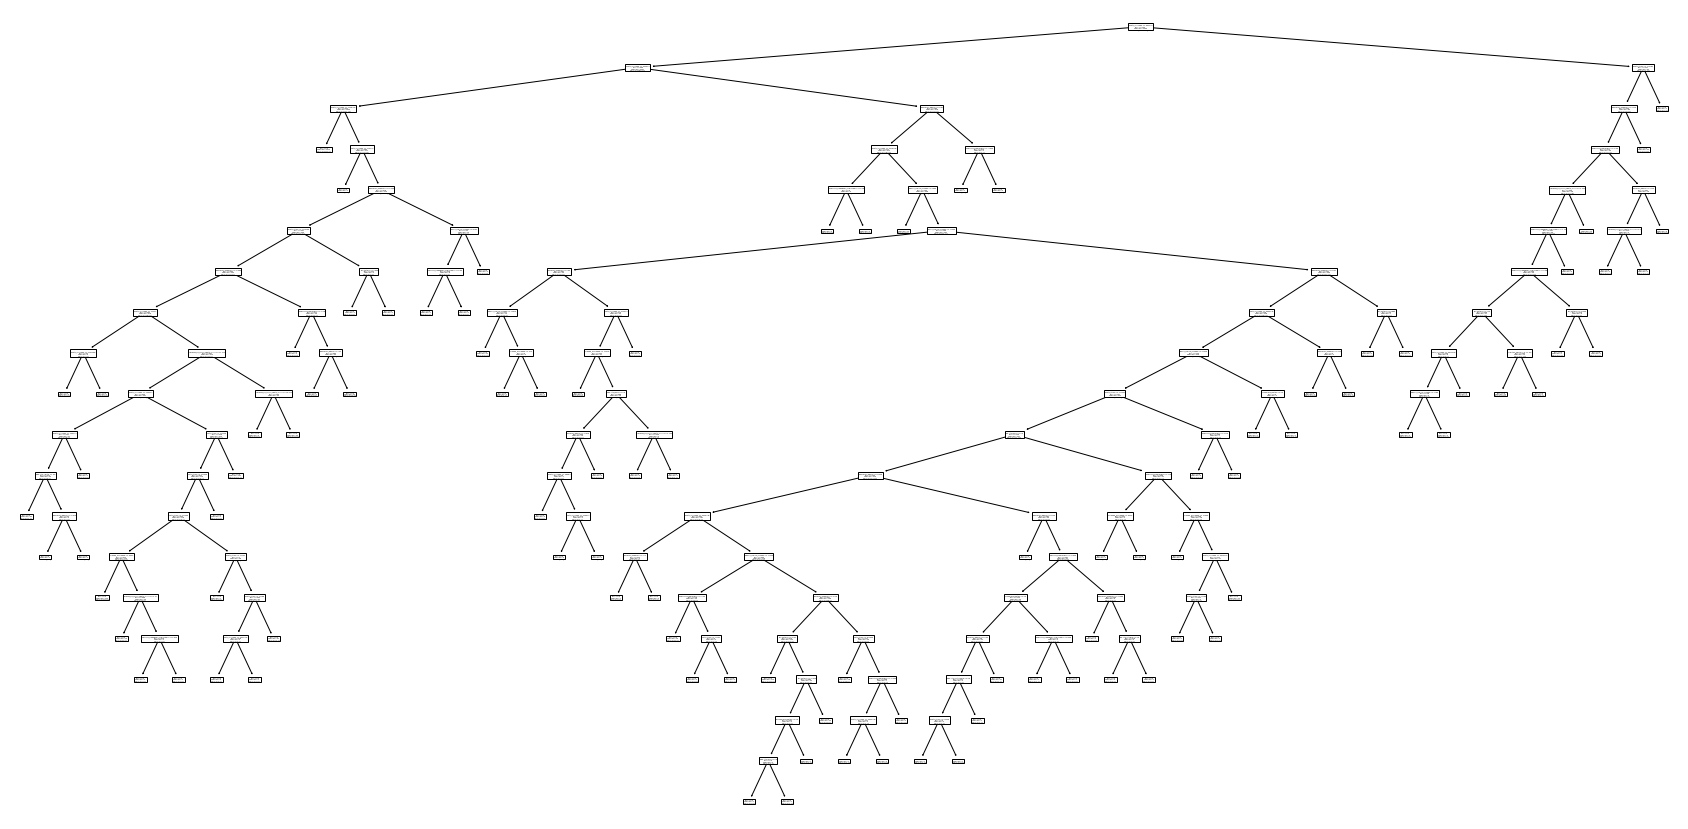

In [77]:
fig , ax=plt.subplots(figsize=(30,15))
plot=plot_tree(decision_tree=Arbol_Simple,
              feature_names=x_train.columns,
              ax=ax)


**Importancia de Variables**

In [78]:
Importancia_Predictores= pd.DataFrame({
"Predictor": x_train.columns,
    "Importancia": Arbol_Simple.feature_importances_
    
})

Importancia_Predictores.sort_values("Importancia",ascending=False)

,Predictor,Importancia
17,Gasto_Vehiculos,0.431596
25,Poblacion_Empresario,0.082662
19,Gasto_Otros,0.077445
23,Educacion_Superior,0.066652
20,Educacion_Media,0.065822
21,Poblacion_Trabajador_Cualificado,0.059585
26,Ingresos_De_20000_Hasta_40000,0.057445
24,Tipo_Soltero,0.045520
22,Medico_Seguro_Privado,0.045065
18,Vivienda_Propiedad,0.027195


**Error Train**

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1981
           1       1.00      1.00      1.00       118

    accuracy                           1.00      2099
   macro avg       1.00      1.00      1.00      2099
weighted avg       1.00      1.00      1.00      2099



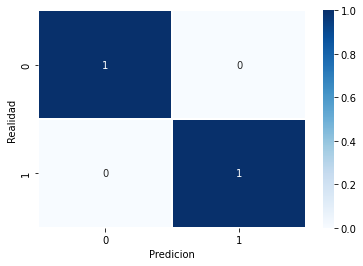

Predicion     0    1   All
Realidad                  
0          1981    0  1981
1             0  118   118
All        1981  118  2099


In [79]:
MetricasMatrixConfusion(y_train,Arbol_Simple,x_train)

Modelo AUC: 1.0


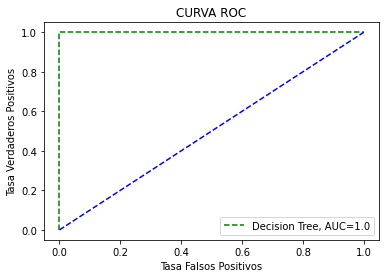

In [80]:
curva_roc(y_train,Arbol_Simple,x_train)

In [81]:
Prediccion_Train_AD=Arbol_Simple.predict(x_train)
Probabilidades_Train_AD=Arbol_Simple.predict_proba(x_train)

Accuracy_Train_AD=metrics.accuracy_score(y_train,Prediccion_Train_AD)
fscore_0_train_AD= f1_score(y_train,Prediccion_Train_AD,pos_label=0)
fscore_1_train_AD=f1_score(y_train,Prediccion_Train_AD,pos_label=1)

AUC_Train_AD=round(roc_auc_score(y_train,Probabilidades_Train_AD[:,1]),4)
AUC_Train_AD

1.0

**Error Test**

Accuracy: 0.9133333333333333
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       849
           1       0.30      0.39      0.34        51

    accuracy                           0.91       900
   macro avg       0.63      0.67      0.65       900
weighted avg       0.93      0.91      0.92       900



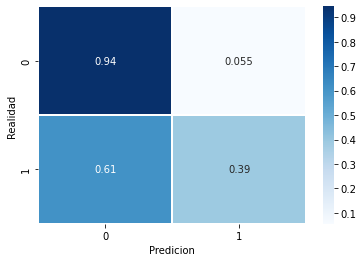

Predicion    0   1  All
Realidad               
0          802  47  849
1           31  20   51
All        833  67  900


In [82]:
MetricasMatrixConfusion(y_test,Arbol_Simple,x_test)

Modelo AUC: 0.6683988082865655


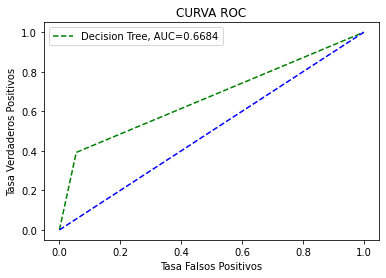

In [83]:
curva_roc(y_test,Arbol_Simple,x_test)

In [84]:
Prediccion_test_AD=Arbol_Simple.predict(x_test)
Probabilidades_test_AD=Arbol_Simple.predict_proba(x_test)

Accuracy_test_AD=metrics.accuracy_score(y_test,Prediccion_test_AD)
fscore_0_test_AD= f1_score(y_test,Prediccion_test_AD,pos_label=0)
fscore_1_test_AD=f1_score(y_test,Prediccion_test_AD,pos_label=1)

AUC_test_AD=round(roc_auc_score(y_test,Probabilidades_test_AD[:,1]),4)
AUC_test_AD

0.6684

## **Arbol Pruned**

**Criterio de costo de complejidad - Cost complexity criterion**

Para encontrar el balance entre la profundidad y complejidad del árbol con respecto a la capacidad predictiva del modelo en datos de test, normalmente se hace crecer el árbol de decisión hasta su mayor extensión y luego se ejecuta el proceso de poda para identificar el subárbol óptimo.

Se encuentra el subárbol óptimo usando el parámetro de costo de complejidad ( 
α
 ) que penaliza la función objetivo abajo para el número de nodos hoja en el árbol (T)
 
 $$
\mathrm{Err}_\alpha(f) = \sum_{t=1}^{T}\mathrm{Err}_t(f)  + \alpha|f|,\quad \alpha\geq 0,
$$

* Para un valor dado de  α se encuentra el árbol podado más pequeño (número de nodos hoja) que tiene el error más bajo de penalización. 
* Se evalúan múltiples moodelos a través de un espectro de   α y se usa validación cruzada para identificar el   α óptimo, y por lo tanto el subárbol óptimo

	* $\alpha\to0\ \: \Rightarrow$ a large tree (i.e. $\alpha=0\Rightarrow f_0$).
	* $\alpha\to\infty\Rightarrow$ a very small tree.

In [85]:
f=Arbol_Simple

f.get_n_leaves()
f.get_depth()

f_alpha = f.cost_complexity_pruning_path(x_train, y_train)
alphas = f_alpha['ccp_alphas']
impurs = f_alpha['impurities']

fs = []
fs = []
for j in alphas:
    f = DecisionTreeClassifier(ccp_alpha=j, random_state=77)
    f.fit(x_train, y_train)
    fs.append(f)
fs
nodes = []
depth = []
for j in range(0, alphas.shape[0]):
    nodes.append(fs[j].tree_.node_count)
    depth.append(fs[j].tree_.max_depth)
train_scores = [f.score(x_train, y_train) for f in fs]
test_scores  = [f.score(x_test, y_test)   for f in fs]

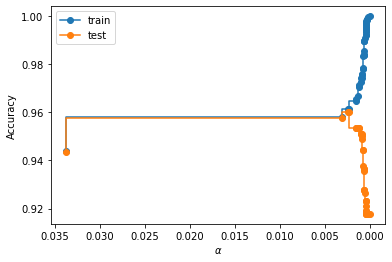

In [86]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel('Accuracy')
#ax.set_title(r'Accuracy vs $\alpha$')
ax.plot(alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(alphas, test_scores,  marker='o', label='test',  drawstyle='steps-post')
ax.invert_xaxis()
ax.legend()
plt.show()

## **Optimización de Hiperparámetros**

La optimización de hiperparámetros se refiere al proceso de encontrar la combinación óptima de hiperparámetros para un modelo de aprendizaje automático. Los hiperparámetros son variables que no se aprenden automáticamente durante el entrenamiento del modelo, sino que deben ser configuradas por el usuario antes de iniciar el proceso de entrenamiento.

* min_samples_split es un hiperparámetro en los árboles de decisión que indica el número mínimo de muestras requeridas para dividir un nodo interno en subnodos
* min_samples_leaf es otro hiperparámetro utilizado en los árboles de decisión. Indica el número mínimo de muestras requeridas en una hoja del árbol.

In [87]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2099 entries, 2449 to 2083
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   target  2099 non-null   category
dtypes: category(1)
memory usage: 18.6 KB


In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
param_grid={
    
    "max_depth":[2,4,5,7],
    "min_samples_split":[2,4,5,7,9],
     "min_samples_leaf":[2,4,5,7,9],
    
}

grid_search=GridSearchCV(Arbol_Simple,param_grid,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': [2, 4, 5, 7],
                         'min_samples_leaf': [2, 4, 5, 7, 9],
                         'min_samples_split': [2, 4, 5, 7, 9]})

In [90]:
# Obtener los mejores hiperparámetros encontrados
best_params= grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'max_depth': 5, 'min_samples_leaf': 7, 'min_samples_split': 2}


In [91]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2099 entries, 2449 to 2083
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   target  2099 non-null   category
dtypes: category(1)
memory usage: 18.6 KB


**Entrenamos el Modelo con los mejores Hiperparámetros**

In [92]:
best_tree= DecisionTreeClassifier(max_depth=5, min_samples_leaf=7,min_samples_split=2)
best_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=7)

In [93]:
y_train

,target
2449,0
480,0
1212,0
1068,0
2674,0
...,...
240,0
1740,0
1072,0
2947,0


Profundidad del árbol: 5
Número de nodos terminales: 16


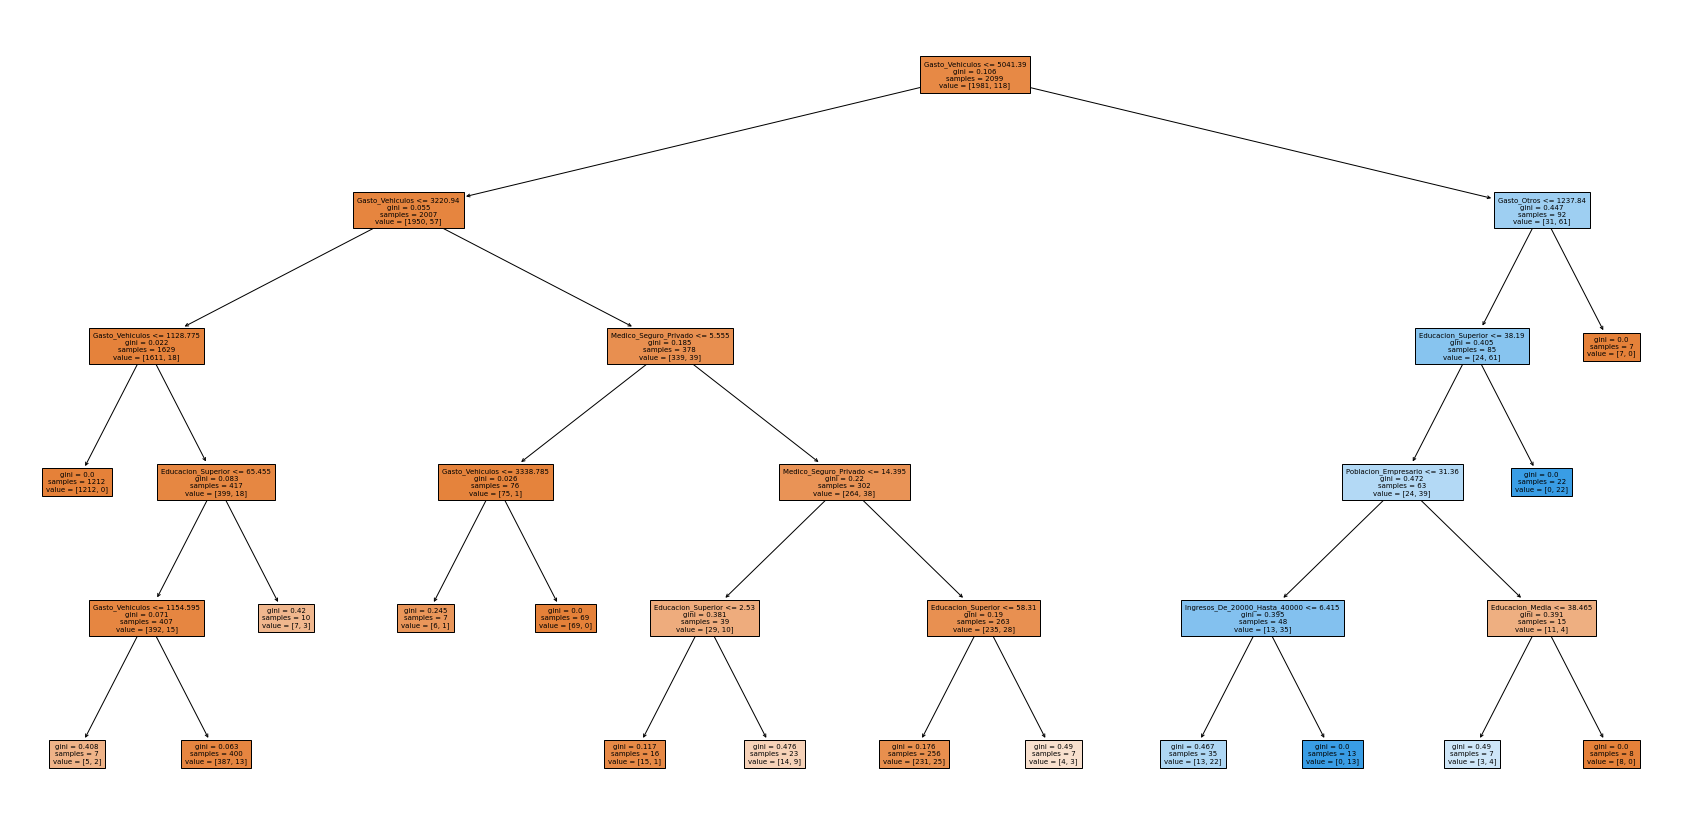

In [94]:
fig, ax = plt.subplots(figsize=(30, 15))
print(f"Profundidad del árbol: {best_tree.get_depth()}")
print(f"Número de nodos terminales: {best_tree.get_n_leaves()}")
plot=plot_tree(decision_tree=best_tree,
              feature_names=x_train.columns,
                filled        = True,
               fontsize      = 7,
                ax            = ax
              )

In [95]:
Importancia_Predictores= pd.DataFrame({
"Predictor": x_train.columns,
    "Importancia": best_tree.feature_importances_
    
})

Importancia_Predictores.sort_values("Importancia",ascending=False)

,Predictor,Importancia
17,Gasto_Vehiculos,0.727930
23,Educacion_Superior,0.089330
19,Gasto_Otros,0.061878
25,Poblacion_Empresario,0.045415
22,Medico_Seguro_Privado,0.028506
26,Ingresos_De_20000_Hasta_40000,0.024294
20,Educacion_Media,0.022647
14,Productos_Vehiculos_3,0.000000
24,Tipo_Soltero,0.000000
21,Poblacion_Trabajador_Cualificado,0.000000


**Error Train**

Accuracy: 0.9652215340638399
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1981
           1       0.79      0.52      0.63       118

    accuracy                           0.97      2099
   macro avg       0.88      0.75      0.80      2099
weighted avg       0.96      0.97      0.96      2099



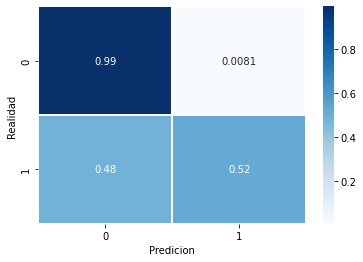

Predicion     0   1   All
Realidad                 
0          1965  16  1981
1            57  61   118
All        2022  77  2099


In [96]:
MetricasMatrixConfusion(y_train,best_tree,x_train)

Modelo AUC: 0.9503161389128927


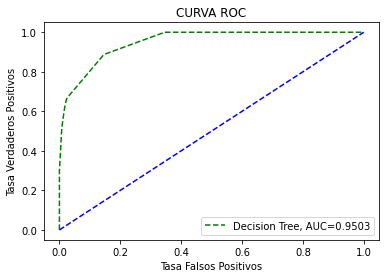

In [97]:
curva_roc(y_train,best_tree,x_train)

In [98]:
Prediccion_train_AD1=best_tree.predict(x_train)
Probabilidades_train_AD1=best_tree.predict_proba(x_train)

Accuracy_train_AD1=metrics.accuracy_score(y_train,Prediccion_train_AD1)
fscore_0_train_AD1= f1_score(y_train,Prediccion_train_AD1,pos_label=0)
fscore_1_train_AD1=f1_score(y_train,Prediccion_train_AD1,pos_label=1)

AUC_train_AD1=round(roc_auc_score(y_train,Probabilidades_train_AD1[:,1]),4)
AUC_train_AD1

0.9503

**Error Test**

Accuracy: 0.9533333333333334
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       849
           1       0.65      0.39      0.49        51

    accuracy                           0.95       900
   macro avg       0.80      0.69      0.73       900
weighted avg       0.95      0.95      0.95       900



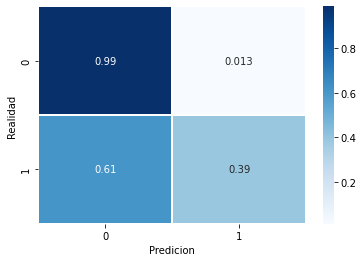

Predicion    0   1  All
Realidad               
0          838  11  849
1           31  20   51
All        869  31  900


In [99]:
MetricasMatrixConfusion(y_test,best_tree,x_test)

Modelo AUC: 0.7963116931106954


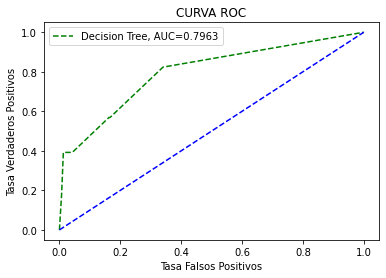

In [100]:
curva_roc(y_test,best_tree,x_test)

In [101]:
Prediccion_test_AD1=best_tree.predict(x_test)
Probabilidades_test_AD1=best_tree.predict_proba(x_test)

Accuracy_test_AD1=metrics.accuracy_score(y_test,Prediccion_test_AD1)
fscore_0_test_AD1= f1_score(y_test,Prediccion_test_AD1,pos_label=0)
fscore_1_test_AD1=f1_score(y_test,Prediccion_test_AD1,pos_label=1)

AUC_test_AD1=round(roc_auc_score(y_test,Probabilidades_test_AD1[:,1]),4)
AUC_test_AD1

0.7963

## **Random Forest con Python:clasificación**

El término ensamblador significa grupo. Los métodos tipo ensamblador están formados de un grupo de modelos predictivos que permiten alcanzar una mejor precisión y estabilidad del modelo. Estos proveen una mejora significativa a los modelos de árboles de decisión.

¿Por qué surgen los ensambladores de árboles?

* Así como todos los modelos, un árbol de decisión también sufre de los problemas de sesgo y varianza. Es decir, ‘cuánto en promedio son los valores predecidos diferentes de los valores reales’ (sesgo) y ‘cuan diferentes serán las predicciones de un modelo en un mismo punto si muestras diferentes se tomaran de la misma población’ (varianza).

* Al construir un árbol pequeño se obtendrá un modelo con baja varianza y alto sesgo. Normalmente, al incrementar la complejidad del modelo, se verá una reducción en el error de predicción debido a un sesgo más bajo en el modelo. En un punto el modelo será muy complejo y se producirá un sobre-ajuste del modelo el cual empezará a sufrir de varianza alta.

* El modelo óptimo debería mantener un balance entre estos dos tipos de errores. A esto se le conoce como “trade-off” (equilibrio) entre errores de sesgo y varianza. El uso de ensambladores es una forma de aplicar este “trade-off

**Ventajas de Random Forest**

* Existen muy pocas suposiciones y por lo tanto la preparación de los datos es mínima.
* Puede manejar hasta miles de variables de entrada e identificar las más significativas. Método de reducción de dimensionalidad.
* Una de las salidas del modelo es la importancia de variables.
* Incorpora métodos efectivos para estimar valores faltantes.
* Es posible usarlo como método no supervisado (clustering) y detección de outliers.

**Desventajas de Random Forest**

* Pérdida de interpretación
* Bueno para clasificación, no tanto para regresión. Las predicciones no son de naturaleza continua.
* En regresión, no puede predecir más allá del rango de valores del conjunto de entrenamiento.
* Poco control en lo que hace el modelo (modelo caja negra para modeladores estadísticos)

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
Modelo_RF=RandomForestClassifier(random_state=123)
Modelo_RF=Modelo_RF.fit(x_train,y_train)

In [104]:
Importancia_Predictores= pd.DataFrame({
"Predictor":x_train.columns,
    "Importancia": Modelo_RF.feature_importances_
    
})

Importancia_Predictores.sort_values("Importancia",ascending=False)

,Predictor,Importancia
17,Gasto_Vehiculos,0.394609
19,Gasto_Otros,0.079272
23,Educacion_Superior,0.066205
20,Educacion_Media,0.061856
22,Medico_Seguro_Privado,0.060696
25,Poblacion_Empresario,0.055725
21,Poblacion_Trabajador_Cualificado,0.050145
18,Vivienda_Propiedad,0.048861
24,Tipo_Soltero,0.046781
26,Ingresos_De_20000_Hasta_40000,0.038556


**Error Train**

Accuracy: 0.9995235826584088
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1981
           1       1.00      0.99      1.00       118

    accuracy                           1.00      2099
   macro avg       1.00      1.00      1.00      2099
weighted avg       1.00      1.00      1.00      2099



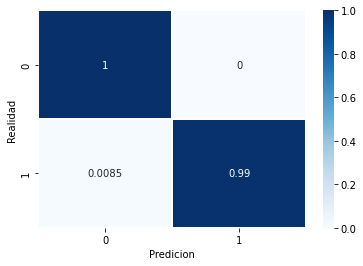

Predicion     0    1   All
Realidad                  
0          1981    0  1981
1             1  117   118
All        1982  117  2099


In [105]:
MetricasMatrixConfusion(y_train,Modelo_RF,x_train)

Modelo AUC: 1.0


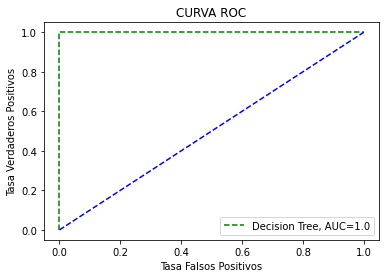

In [106]:
curva_roc(y_train,Modelo_RF,x_train)

In [107]:
Prediccion_train_RF=Modelo_RF.predict(x_train)
Probabilidades_train_RF=Modelo_RF.predict_proba(x_train)

Accuracy_train_RF=metrics.accuracy_score(y_train,Prediccion_train_RF)
fscore_0_train_RF= f1_score(y_train,Prediccion_train_RF,pos_label=0)
fscore_1_train_RF=f1_score(y_train,Prediccion_train_RF,pos_label=1)

AUC_train_RF=round(roc_auc_score(y_train,Probabilidades_train_RF[:,1]),4)
AUC_train_RF

1.0

**Error Test**

Accuracy: 0.9533333333333334
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       849
           1       0.70      0.31      0.43        51

    accuracy                           0.95       900
   macro avg       0.83      0.65      0.70       900
weighted avg       0.95      0.95      0.94       900



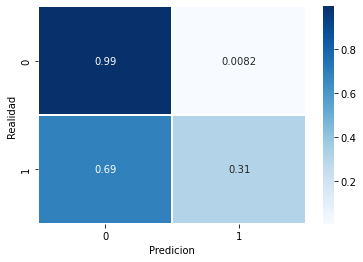

Predicion    0   1  All
Realidad               
0          842   7  849
1           35  16   51
All        877  23  900


In [108]:
MetricasMatrixConfusion(y_test,Modelo_RF,x_test)

Modelo AUC: 0.8917065059239243


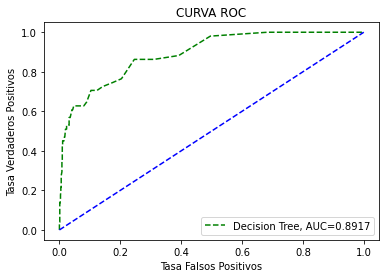

In [109]:
curva_roc(y_test,Modelo_RF,x_test)

In [110]:
Prediccion_test_RF=Modelo_RF.predict(x_test)
Probabilidades_test_RF=Modelo_RF.predict_proba(x_test)

Accuracy_test_RF=metrics.accuracy_score(y_test,Prediccion_test_RF)
fscore_0_test_RF= f1_score(y_test,Prediccion_test_RF,pos_label=0)
fscore_1_test_RF=f1_score(y_test,Prediccion_test_RF,pos_label=1)

AUC_test_RF=round(roc_auc_score(y_test,Probabilidades_test_RF[:,1]),4)
AUC_test_RF

0.8917

## **Optimzación Random Forest**

In [111]:
param_grid={
'n_estimators':[50,100,300,500],
    'max_depth':[3,5,7],
     'min_samples_split': [2, 5,8,10]
}

grid_search = GridSearchCV(estimator=Modelo_RF, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 5, 8, 10],
                         'n_estimators': [50, 100, 300, 500]})

In [112]:
best_params = grid_search.best_params_
best_params

{'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 500}

In [113]:
best_score = grid_search.best_score_
best_score

0.9576008637345153

In [114]:
Modelo_RF_OPT= RandomForestClassifier(**best_params)
Modelo_RF_OPT.fit(x_train,y_train)

RandomForestClassifier(max_depth=7, n_estimators=500)

In [115]:
Importancia_Predictores= pd.DataFrame({
"Predictor":x_train.columns,
    "Importancia": Modelo_RF_OPT.feature_importances_
    
})

Importancia_Predictores.sort_values("Importancia",ascending=False)

,Predictor,Importancia
17,Gasto_Vehiculos,4.890687e-01
23,Educacion_Superior,7.235277e-02
19,Gasto_Otros,6.633940e-02
22,Medico_Seguro_Privado,5.122305e-02
20,Educacion_Media,5.020521e-02
25,Poblacion_Empresario,4.746652e-02
18,Vivienda_Propiedad,4.154331e-02
24,Tipo_Soltero,3.796522e-02
21,Poblacion_Trabajador_Cualificado,3.563008e-02
26,Ingresos_De_20000_Hasta_40000,3.270982e-02


**Error Train**

Accuracy: 0.9733206288708909
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1981
           1       1.00      0.53      0.69       118

    accuracy                           0.97      2099
   macro avg       0.99      0.76      0.84      2099
weighted avg       0.97      0.97      0.97      2099



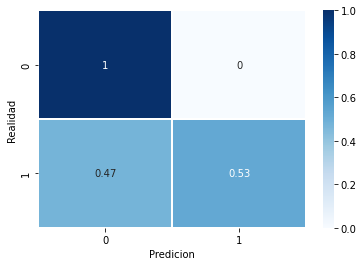

Predicion     0   1   All
Realidad                 
0          1981   0  1981
1            56  62   118
All        2037  62  2099


In [116]:
MetricasMatrixConfusion(y_train,Modelo_RF_OPT,x_train)

Modelo AUC: 0.9934676032478033


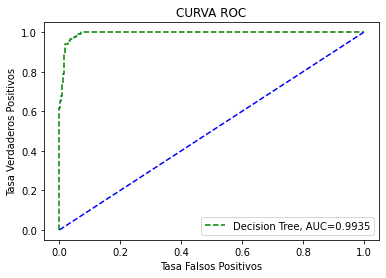

In [117]:
curva_roc(y_train,Modelo_RF_OPT,x_train)

In [118]:
Prediccion_train_RF1=Modelo_RF_OPT.predict(x_train)
Probabilidades_train_RF1=Modelo_RF_OPT.predict_proba(x_train)

Accuracy_train_RF1=metrics.accuracy_score(y_train,Prediccion_train_RF1)
fscore_0_train_RF1= f1_score(y_train,Prediccion_train_RF1,pos_label=0)
fscore_1_train_RF1=f1_score(y_train,Prediccion_train_RF1,pos_label=1)

AUC_train_RF1=round(roc_auc_score(y_train,Probabilidades_train_RF1[:,1]),4)
AUC_train_RF1

0.9935

**Error Test**

Accuracy: 0.9533333333333334
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       849
           1       0.76      0.25      0.38        51

    accuracy                           0.95       900
   macro avg       0.86      0.63      0.68       900
weighted avg       0.95      0.95      0.94       900



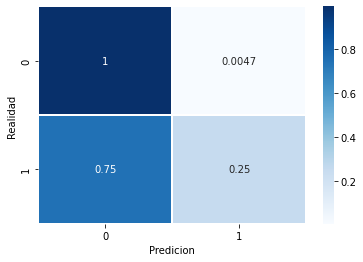

Predicion    0   1  All
Realidad               
0          845   4  849
1           38  13   51
All        883  17  900


In [119]:
MetricasMatrixConfusion(y_test,Modelo_RF_OPT,x_test)

Modelo AUC: 0.8875262708145685


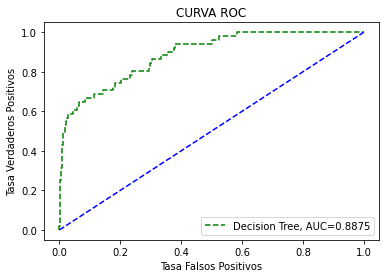

In [120]:
curva_roc(y_test,Modelo_RF_OPT,x_test)

In [121]:
Prediccion_test_RF1=Modelo_RF_OPT.predict(x_test)
Probabilidades_test_RF1=Modelo_RF_OPT.predict_proba(x_test)

Accuracy_test_RF1=metrics.accuracy_score(y_test,Prediccion_test_RF1)
fscore_0_test_RF1= f1_score(y_test,Prediccion_test_RF1,pos_label=0)
fscore_1_test_RF1=f1_score(y_test,Prediccion_test_RF1,pos_label=1)

AUC_test_RF1=round(roc_auc_score(y_test,Probabilidades_test_RF1[:,1]),4)
AUC_test_RF1

0.8875

## **El XGBoost Classifier**

Un modelo Gradient Boosting está formado por un conjunto de árboles de decisión individuales, entrenados de forma secuencial, de forma que cada nuevo árbol trata de mejorar los errores de los árboles anteriores. La predicción de una nueva observación se obtiene agregando las predicciones de todos los árboles individuales que forman el modelo


El XGBoost Classifier es un algoritmo de aprendizaje automático basado en árboles de decisión que utiliza el método de refuerzo (boosting). XGBoost, que significa "Extreme Gradient Boosting", ha ganado popularidad debido a su eficacia en una amplia variedad de problemas de clasificación y regresión.

A diferencia de los métodos tradicionales de árboles de decisión, XGBoost utiliza un enfoque de refuerzo que combina múltiples modelos de árboles débiles para formar un modelo más fuerte y preciso. El algoritmo se basa en la idea de que los árboles posteriores se entrenan para corregir los errores cometidos por los árboles anteriores, lo que permite mejorar gradualmente el rendimiento del modelo.

XGBoost Classifier tiene varias características y ventajas que lo hacen popular:

1) Regularización: XGBoost incorpora técnicas de regularización para evitar el sobreajuste del modelo. Esto incluye la penalización de los términos de complejidad del modelo, lo que ayuda a controlar la estructura del árbol y evitar el crecimiento excesivo.

2) Manejo de características faltantes: XGBoost puede manejar automáticamente los valores faltantes en los datos, lo que ahorra tiempo en la fase de preprocesamiento.

3) Optimización de rendimiento: XGBoost utiliza técnicas avanzadas de optimización para mejorar la eficiencia computacional y reducir el tiempo de entrenamiento. Esto incluye el uso de árboles de decisión histogramáticos, que comprimen los datos y aceleran el proceso de entrenamiento.

4) Paralelización: XGBoost tiene la capacidad de aprovechar el poder de cálculo de múltiples núcleos y distribuir tareas en múltiples hilos, lo que mejora aún más el rendimiento y la velocidad de entrenamiento.

5) Importancia de características: XGBoost proporciona una medida de la importancia de las características utilizadas en el modelo, lo que permite identificar las características más relevantes para el problema en cuestión.

In [122]:
y_train=y_train.astype(int)

In [123]:
xgb_model=xgb.XGBClassifier()
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

**Error Train**

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1981
           1       1.00      1.00      1.00       118

    accuracy                           1.00      2099
   macro avg       1.00      1.00      1.00      2099
weighted avg       1.00      1.00      1.00      2099



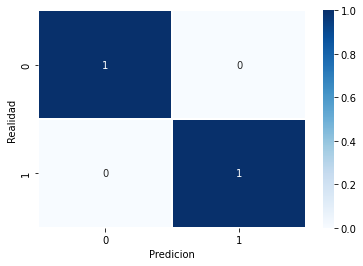

Predicion     0    1   All
Realidad                  
0          1981    0  1981
1             0  118   118
All        1981  118  2099


In [124]:
MetricasMatrixConfusion(y_train,xgb_model,x_train)

Modelo AUC: 1.0


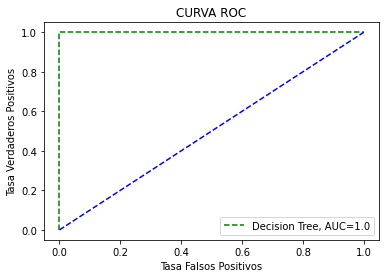

In [125]:
curva_roc(y_train,xgb_model,x_train)

In [126]:
Prediccion_train_XGB=xgb_model.predict(x_train)
Probabilidades_train_XGB=xgb_model.predict_proba(x_train)

Accuracy_train_XGB=metrics.accuracy_score(y_train,Prediccion_train_XGB)
fscore_0_train_XGB= f1_score(y_train,Prediccion_train_XGB,pos_label=0)
fscore_1_train_XGB=f1_score(y_train,Prediccion_train_XGB,pos_label=1)

AUC_train_XGB=round(roc_auc_score(y_train,Probabilidades_train_XGB[:,1]),4)
AUC_train_XGB

1.0

**Error Test**

Accuracy: 0.9522222222222222
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       849
           1       0.67      0.31      0.43        51

    accuracy                           0.95       900
   macro avg       0.81      0.65      0.70       900
weighted avg       0.94      0.95      0.94       900



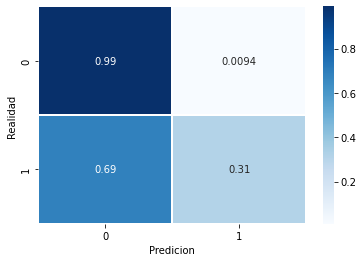

Predicion    0   1  All
Realidad               
0          841   8  849
1           35  16   51
All        876  24  900


In [127]:
MetricasMatrixConfusion(y_test,xgb_model,x_test)

Modelo AUC: 0.8991431672786899


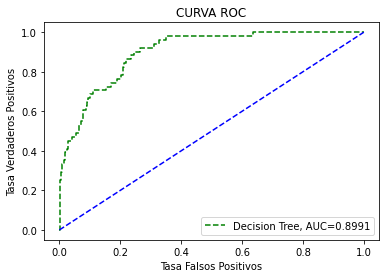

In [128]:
curva_roc(y_test,xgb_model,x_test)

In [129]:
Prediccion_test_XGB=xgb_model.predict(x_test)
Probabilidades_test_XGB=xgb_model.predict_proba(x_test)

Accuracy_test_XGB=metrics.accuracy_score(y_test,Prediccion_test_XGB)
fscore_0_test_XGB= f1_score(y_test,Prediccion_test_XGB,pos_label=0)
fscore_1_test_XGB=f1_score(y_test,Prediccion_test_XGB,pos_label=1)

AUC_test_XGB=round(roc_auc_score(y_test,Probabilidades_test_XGB[:,1]),4)
AUC_test_XGB

0.8991

In [130]:
y_train.value_counts(normalize=False)

target
0         1981
1          118
dtype: int64

### **Optimzación XGB**

* El hiperparámetro 'scale_pos_weight' en XGBoost es un parámetro que se utiliza para abordar el desbalance de clases en problemas de clasificación binaria. Cuando tenemos un conjunto de datos donde una de las clases está significativamente subrepresentada en comparación con la otra clase, se dice que el conjunto de datos es desbalanceado.

* En situaciones de desbalance de clases, el modelo puede tener dificultades para aprender adecuadamente la clase minoritaria debido a su falta de ejemplos. Aquí es donde entra en juego el parámetro 'scale_pos_weight'
* El parámetro 'scale_pos_weight' permite asignar un peso mayor a la clase positiva (la clase minoritaria) en comparación con la clase negativa (la clase mayoritaria). Esto significa que el modelo penalizará más los errores en la clase positiva, lo que puede ayudar a equilibrar el aprendizaje y mejorar el rendimiento en el conjunto de datos desbalanceado.

* scale_pos_weight = count(negative examples) / count(positive examples)

In [131]:
 200/120960

0.0016534391534391533

In [132]:
learning_rate_values = np.arange(0.05, 0.31, 0.05)        # 6 valores posibles
max_depth_values = np.arange(3, 10, 1)                   # 7 valores posibles
min_child_weight_values = np.arange(1, 10, 1)            # 9 valores posibles
subsample_values = np.arange(0.7, 1.0, 0.1)              # 3 valores posibles
colsample_bytree_values = np.arange(0.7, 1.0, 0.1)       # 3 valores posibles
scale_pos_weight_values = np.arange(1, 100, 5)           # 20 valores posibles

# Total de combinaciones posibles
total_combinations = (
    len(learning_rate_values) *
    len(max_depth_values) *
    len(min_child_weight_values) *
    len(subsample_values) *
    len(colsample_bytree_values) *
    len(scale_pos_weight_values)
)

print("Número total de combinaciones posibles:", total_combinations)

Número total de combinaciones posibles: 120960


In [133]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'learning_rate': np.arange(0.05, 0.31, 0.05),
    'max_depth': np.arange(3, 10, 1),
    'min_child_weight': np.arange(1, 10, 1),
    'subsample': np.arange(0.7, 1.0, 0.1),
    'colsample_bytree': np.arange(0.7, 1.0, 0.1),
    'scale_pos_weight': np.arange(1, 100, 5)
    
}
xgb_clf = xgb.XGBClassifier(random_state=42)

random_search = RandomizedSearchCV(
    xgb_clf,
    param_distributions=param_dist,
    n_iter=200,
    scoring='accuracy',
    n_jobs=-1,
    cv=5,
    verbose=3,
    random_state=42
)
random_search.fit(x_train, y_train)
best_xgb_clf = random_search.best_estimator_
accuracy = best_xgb_clf.score(x_test, y_test)
print("Mejor precisión en el conjunto de prueba:", accuracy)
print("Mejores hiperparámetros:", random_search.best_params_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Mejor precisión en el conjunto de prueba: 0.9511111111111111
Mejores hiperparámetros: {'subsample': 0.9999999999999999, 'scale_pos_weight': 1, 'min_child_weight': 8, 'max_depth': 4, 'learning_rate': 0.1, 'colsample_bytree': 0.8999999999999999}


## **Optimización Bayesiana**

La optimización bayesiana es una técnica para optimizar funciones costosas o computacionalmente costosas que no tienen una forma analítica para su optimización directa. En lugar de utilizar un enfoque tradicional de prueba y error, la optimización bayesiana utiliza el teorema de Bayes para seleccionar de manera inteligente las próximas configuraciones de parámetros para evaluar y, con el tiempo, converge hacia el conjunto óptimo de parámetros.



In [134]:
from skopt import BayesSearchCV

In [135]:
param_space = {
    'learning_rate': (0.01, 0.3, 'log-uniform'),
    'max_depth': (3, 10),
    'min_child_weight': (1, 10),
    'subsample': (0.7, 1.0, 'uniform'),
    'colsample_bytree': (0.7, 1.0, 'uniform'),
    'scale_pos_weight': (1, 100)
}

xgb_clf = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

bayes_search = BayesSearchCV(
    xgb_clf,
    param_space,
    n_iter=50,  # Número de iteraciones (evaluaciones de hiperparámetros)
    cv=5,       # Número de divisiones para la validación cruzada
    n_jobs=-1,  # Utilizar todos los núcleos de CPU disponibles
    verbose=1,  # Muestra información sobre la búsqueda
    random_state=42
)

bayes_search.fit(x_train, y_train)
best_xgb_clf = bayes_search.best_estimator_

accuracy = best_xgb_clf.score(x_test, y_test)
print("Mejor precisión en el conjunto de prueba:", accuracy)
print("Mejores hiperparámetros:", bayes_search.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [136]:
xgb_model_opt=best_xgb_clf
xgb_model_opt.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.29999999999999993, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=8, max_leaves=0,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, ...)

**Error Train**

Accuracy: 0.9799904716531682
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1981
           1       0.96      0.67      0.79       118

    accuracy                           0.98      2099
   macro avg       0.97      0.83      0.89      2099
weighted avg       0.98      0.98      0.98      2099



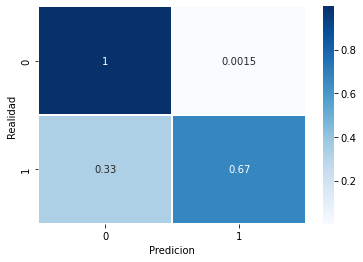

Predicion     0   1   All
Realidad                 
0          1978   3  1981
1            39  79   118
All        2017  82  2099


In [137]:
MetricasMatrixConfusion(y_train,xgb_model_opt,x_train)

Modelo AUC: 0.9917671266865733


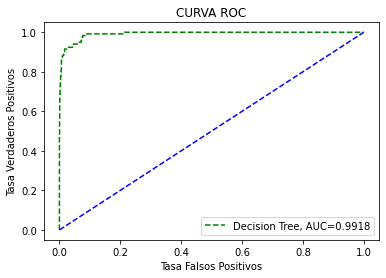

In [138]:
curva_roc(y_train,xgb_model_opt,x_train)

In [139]:
Prediccion_train_XGB_opt=xgb_model.predict(x_train)
Probabilidades_train_XGB_opt=xgb_model.predict_proba(x_train)

Accuracy_train_XGB1=metrics.accuracy_score(y_train,Prediccion_train_XGB_opt)
fscore_0_train_XGB1= f1_score(y_train,Prediccion_train_XGB_opt,pos_label=0)
fscore_1_train_XGB1=f1_score(y_train,Prediccion_train_XGB_opt,pos_label=1)

AUC_train_XGB1=round(roc_auc_score(y_train,Probabilidades_train_XGB_opt[:,1]),4)
AUC_train_XGB1

1.0

**Test Error**

Accuracy: 0.9511111111111111
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       849
           1       0.62      0.35      0.45        51

    accuracy                           0.95       900
   macro avg       0.79      0.67      0.71       900
weighted avg       0.94      0.95      0.94       900



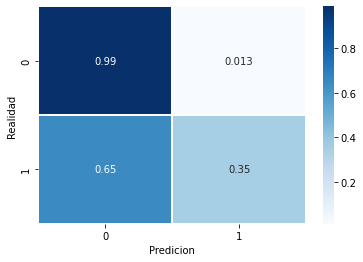

Predicion    0   1  All
Realidad               
0          838  11  849
1           33  18   51
All        871  29  900


In [140]:
MetricasMatrixConfusion(y_test,xgb_model_opt,x_test)

Modelo AUC: 0.8877341278089562


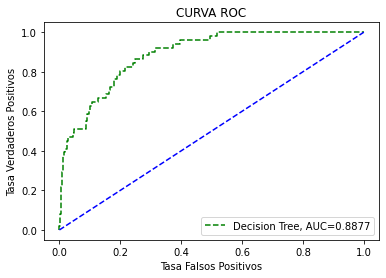

In [141]:
curva_roc(y_test,xgb_model_opt,x_test)

In [142]:
Prediccion_test_XGB_opt=xgb_model.predict(x_test)
Probabilidades_test_XGB_opt=xgb_model.predict_proba(x_test)

Accuracy_test_XGB1=metrics.accuracy_score(y_test,Prediccion_test_XGB_opt)
fscore_0_test_XGB1= f1_score(y_test,Prediccion_test_XGB_opt,pos_label=0)
fscore_1_test_XGB1=f1_score(y_test,Prediccion_test_XGB_opt,pos_label=1)

AUC_test_XGB1=round(roc_auc_score(y_test,Probabilidades_test_XGB_opt[:,1]),4)
AUC_test_XGB1

0.8991

## Tarea: **Iterar CATboos, gbc, lightgbm**

In [143]:
import lightgbm as lgb
import pickle
import catboost
from sklearn.ensemble import GradientBoostingClassifier

import pycaret
from pycaret.classification import *

**lightgbm**

LightGBM es una biblioteca de aprendizaje automático de código abierto desarrollada por Microsoft. Está diseñada para realizar entrenamiento de modelos de Machine Learning de manera eficiente y de alta velocidad, especialmente cuando se trabaja con grandes conjuntos de datos.

LightGBM se basa en el algoritmo de Gradient Boosting, al igual que XGBoost y CatBoost, pero se diferencia en su enfoque y arquitectura para mejorar el rendimiento y la eficiencia. A continuación:

* Gradient Boosting Framework: Al igual que XGBoost y CatBoost, LightGBM utiliza el algoritmo de Gradient Boosting para construir conjuntos de árboles de decisión en forma secuencial para mejorar el rendimiento predictivo del modelo.
* Árboles de Decisión en Hojas (Leaf-wise Splitting): A diferencia del enfoque de "depth-wise splitting" utilizado en XGBoost, LightGBM utiliza "leaf-wise splitting". En lugar de dividir los nodos en cada nivel del árbol, LightGBM elige el nodo que maximiza la reducción de la función de pérdida, lo que puede llevar a árboles más profundos y modelos más precisos.
* Histogram-Based Gradient Boosting: LightGBM utiliza un algoritmo de histograma para encontrar el mejor punto de división para cada característica. Esto reduce la complejidad computacional y hace que el entrenamiento sea más rápido, especialmente cuando se tienen muchas características.


In [144]:
x_test.shape

(900, 27)

In [145]:
lightgbm=lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [146]:
lightgbm.fit(x_train,y_train)

LGBMClassifier(random_state=123)

Accuracy: 0.9533333333333334
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       849
           1       0.66      0.37      0.48        51

    accuracy                           0.95       900
   macro avg       0.81      0.68      0.73       900
weighted avg       0.95      0.95      0.95       900



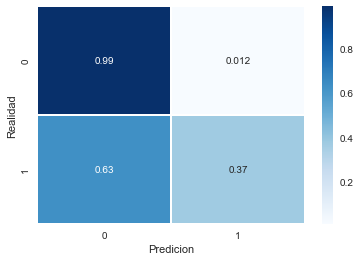

Predicion    0   1  All
Realidad               
0          839  10  849
1           32  19   51
All        871  29  900


In [147]:
MetricasMatrixConfusion(y_test,lightgbm,x_test)

Modelo AUC: 0.9190512482967274


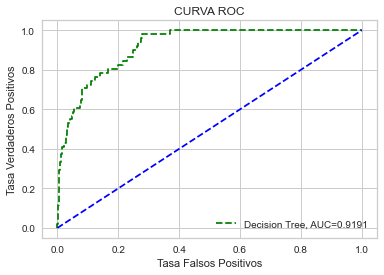

In [148]:
curva_roc(y_test,lightgbm,x_test)

In [149]:
Prediccion_train_L_opt=lightgbm.predict(x_train)
Probabilidades_train_L_opt=lightgbm.predict_proba(x_train)

Accuracy_train_LG=metrics.accuracy_score(y_train,Prediccion_train_L_opt)
fscore_0_train_LG= f1_score(y_train,Prediccion_train_L_opt,pos_label=0)
fscore_1_train_LG=f1_score(y_train,Prediccion_train_L_opt,pos_label=1)

AUC_train_LG=round(roc_auc_score(y_train,Probabilidades_train_L_opt[:,1]),4)
AUC_train_LG

1.0

In [150]:
Prediccion_test_L_opt=lightgbm.predict(x_test)
Probabilidades_test_L_opt=lightgbm.predict_proba(x_test)

Accuracy_test_LG=metrics.accuracy_score(y_test,Prediccion_test_L_opt)
fscore_0_test_LG= f1_score(y_test,Prediccion_test_L_opt,pos_label=0)
fscore_1_test_LG=f1_score(y_test,Prediccion_test_L_opt,pos_label=1)

AUC_test_LG=round(roc_auc_score(y_test,Probabilidades_test_L_opt[:,1]),4)
AUC_test_LG

0.9191

## **Evaluación de Modelos**

In [151]:
df_comparacion_modelos=pd.DataFrame({
    "Modelo":["Logit_Sklearn","LogitStast","Arbol","Arbol Optimo","RF","RF_Opt","XGB","XGB_Opt","lightgbm"],
    "AccuracyTrain":[Accuracy_Train_RL,Accuracy_Train_lg2,Accuracy_Train_AD,Accuracy_train_AD1,Accuracy_train_RF,Accuracy_train_RF1,Accuracy_train_XGB,Accuracy_train_XGB1,Accuracy_train_LG],
    "AccuracyTest":[Accuracy_TestRL,Accuracy_Test_lg2,Accuracy_test_AD,Accuracy_test_AD1,Accuracy_test_RF,Accuracy_test_RF1,Accuracy_test_XGB,Accuracy_test_XGB1,Accuracy_test_LG],
    "F1-Score_0_Train":[fscore_0_train_lg1,fscore_0_train_lg2,fscore_0_train_AD,fscore_0_train_AD1,fscore_0_train_RF,fscore_0_train_RF1,fscore_0_train_XGB,fscore_0_train_XGB1,fscore_0_train_LG],
    "F1-Score_0_Test":[fscore_0_test_lg1,fscore_0_Test_lg2,fscore_0_test_AD,fscore_0_test_AD1,fscore_0_test_RF,fscore_0_test_RF1,fscore_0_test_XGB,fscore_0_test_XGB1,fscore_0_test_LG],
    "F1-Score_1_Train":[fscore_1_train_lg1,fscore_1_train_lg2,fscore_1_train_AD,fscore_1_train_AD1,fscore_1_train_RF,fscore_1_train_RF1,fscore_1_train_XGB,fscore_1_train_XGB1,fscore_1_train_LG],
    "F1-Score_1_Test":[fscore_1_test_lg1,fscore_1_Test_lg2,fscore_1_test_AD,fscore_1_test_AD1,fscore_1_test_RF,fscore_1_test_RF1,fscore_1_test_XGB,fscore_1_test_XGB1,fscore_1_test_LG],
    "AUC_Train":[AUC_Train_RL_Sklearn,AUC_Train_RL2,AUC_Train_AD,AUC_train_AD1,AUC_train_RF,AUC_train_RF1,AUC_train_XGB,AUC_train_XGB1,Accuracy_train_LG],
    "AUC_Test":[AUC_Test_RL_Sklearn,AUC_Test_RL2,AUC_test_AD,AUC_test_AD1,AUC_test_RF,AUC_test_RF1,AUC_test_XGB,AUC_train_XGB1,Accuracy_test_LG]
    

})

In [152]:
df_comparacion_modelos.sort_values("F1-Score_1_Test",ascending=False)

,Modelo,AccuracyTrain,AccuracyTest,F1-Score_0_Train,F1-Score_0_Test,F1-Score_1_Train,F1-Score_1_Test,AUC_Train,AUC_Test
3,Arbol Optimo,0.965222,0.953333,0.981764,0.975553,0.625641,0.487805,0.9503,0.796300
8,lightgbm,1.000000,0.953333,1.000000,0.975581,1.000000,0.475000,1.0000,0.953333
4,RF,0.999524,0.953333,0.999748,0.975666,0.995745,0.432432,1.0000,0.891700
6,XGB,1.000000,0.952222,1.000000,0.975072,1.000000,0.426667,1.0000,0.899100
7,XGB_Opt,1.000000,0.952222,1.000000,0.975072,1.000000,0.426667,1.0000,1.000000
5,RF_Opt,0.973321,0.953333,0.986063,0.975751,0.688889,0.382353,0.9935,0.887500
2,Arbol,1.000000,0.913333,1.000000,0.953627,1.000000,0.338983,1.0000,0.668400
0,Logit_Sklearn,0.936160,0.936667,0.966633,0.966880,0.263736,0.278481,0.8351,0.800300
1,LogitStast,0.883278,0.875556,0.937707,0.933492,0.075472,0.034483,0.4801,0.398300


## **Seleccionar Modelo**

## Entrenar con toda la información

In [156]:
X= Historia[Variables]
y=Historia[["target"]].astype(int).astype("category")

In [157]:
ModeloFinal=lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [159]:
ModeloFinal.fit(X,y)

LGBMClassifier(random_state=123)

[CV 2/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, min_child_weight=9, scale_pos_weight=41, subsample=0.9999999999999999;, score=0.900 total time=   0.4s
[CV 4/5] END colsample_bytree=0.9999999999999999, learning_rate=0.15000000000000002, max_depth=7, min_child_weight=1, scale_pos_weight=16, subsample=0.8999999999999999;, score=0.945 total time=   0.8s
[CV 5/5] END colsample_bytree=0.9999999999999999, learning_rate=0.2, max_depth=9, min_child_weight=2, scale_pos_weight=36, subsample=0.7;, score=0.940 total time=   0.8s
[CV 3/5] END colsample_bytree=0.8999999999999999, learning_rate=0.25, max_depth=5, min_child_weight=4, scale_pos_weight=81, subsample=0.8999999999999999;, score=0.936 total time=   0.6s
[CV 5/5] END colsample_bytree=0.8999999999999999, learning_rate=0.3, max_depth=5, min_child_weight=5, scale_pos_weight=71, subsample=0.8999999999999999;, score=0.938 total time=   0.6s
[CV 1/5] END colsample_bytree=0.7999999999999999, learning_rate=0.3, max_depth=9, min_ch

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2830
           1       1.00      1.00      1.00       169

    accuracy                           1.00      2999
   macro avg       1.00      1.00      1.00      2999
weighted avg       1.00      1.00      1.00      2999



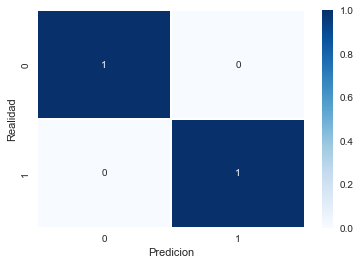

Predicion     0    1   All
Realidad                  
0          2830    0  2830
1             0  169   169
All        2830  169  2999


In [160]:
MetricasMatrixConfusion(y,ModeloFinal,X)

## **Exportar Modelo**

In [161]:
filaname="model_recompra.pkl"

In [162]:
with open(filaname,"wb") as file:
    pickle.dump(ModeloFinal,file)